# Short Assigment 3

## Mathematical Morphology for Color Image Processing

In [40]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

from skimage import morphology
from skimage.morphology import (square, rectangle, diamond, disk, star)
from skimage.color import rgb2hsv

# Function to make opening operation
def openingOp(img,k):
    A = img
    B = morphology.disk(k) # create structuring element
    # applying erotion, and dilation
    AeB = morphology.erosion(A, B)
    AeBdB = morphology.dilation(AeB, B)
    return AeBdB

# Function to get morphological gradient
def MorphologicalGrad(img,k):
    A = img
    B = morphology.disk(k) # create structuring element
    # applying dilation, erotion, and substraction
    AdB = morphology.dilation(A, B)
    AeB = morphology.erosion(A, B)
    AgradB = np.subtract(AdB,AeB)
    return AgradB

# Function to get the root mean squared error of 1-channel image
def rmse(f,g):
    size = f.shape
    return np.sqrt(np.sum(np.square(f-g))/(size[0]*size[1]*size[2]))

# Function to apply opening operation over an RGB image
def RGB_opening(img,k):
    # get R, G, B channels 
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2] 
    # apply opening over each channel 
    nb = openingOp(b,k)
    ng = openingOp(g,k)
    nr = openingOp(r,k)
    # composed a ner RGB image
    new_rgb = np.dstack((nr,ng,nb))
    return new_rgb

# Function to apply composition of operations
def compositionOp(img,k):
    # transform the image to the HSV space
    #hsv_img = rgb2hsv(img)
    hsv_img = matplotlib.colors.rgb_to_hsv(img)
    # get the HUE values
    hue_img = hsv_img[:, :, 0]
    # normalizing the H-channel to the interval 0 - 255
    minH = np.amin(hue_img)
    maxH = np.amax(hue_img)
    hue_norm = ((hue_img - minH)/(maxH - minH))*255  # normalized H-channel
    
    # with the structuring element disk, perform the morphological gradient operation
    # Morphological Gradient:= It is the difference between dilation and erosion of an image.
    mGrad_H = MorphologicalGrad(hue_norm,k) 
    
    # normalizing the resulting morphological gradient to the interval 0 - 255
    min_mGrad_H = np.amin(mGrad_H)
    max_mGrad_H = np.amax(mGrad_H)
    # the normalized gradient will be the new R-channel
    mGrad_H_norm = ((mGrad_H - min_mGrad_H)/(max_mGrad_H - min_mGrad_H))*255
    
    # applying opening to the normalized H-channel, it will be the new G-channel
    mdisk = morphology.disk(k) 
    opened_H_norm = morphology.opening(hue_norm, mdisk)

    # applying closing to the normalized H-channel, it will be the new B-channel
    closed_H_norm = morphology.closing(hue_norm, mdisk)
    
    new_rgb_m2 = np.dstack((mGrad_H_norm,opened_H_norm,closed_H_norm))
    return new_rgb_m2

## Examples

### Test Case 1

Error Test Case 1:  40.0700


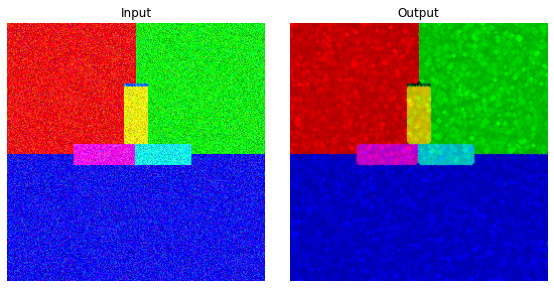

In [41]:
input_img1 = imageio.imread("colors_noise.png")
k = 2

# METHOD 1
output_img1 = RGB_opening(input_img1,k).astype(np.uint8)
print("Error Test Case 1:  %.4f" % (rmse(input_img1.astype(float), output_img1.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img1)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img1)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

### Test Case 2

Error Test Case 2:  24.2313


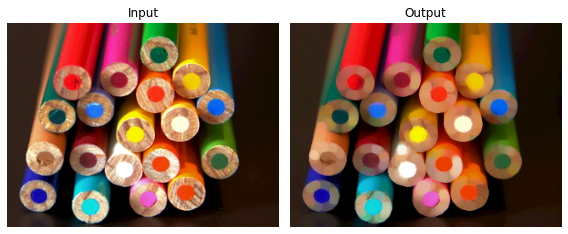

In [42]:
input_img2 = imageio.imread("pencil.png")
k = 5

# METHOD 1
output_img2 = RGB_opening(input_img2,k).astype(np.uint8)
print("Error Test Case 2:  %.4f" % (rmse(input_img2.astype(float), output_img2.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img2)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img2)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

### Test Case 3

Error Test Case 3:  109.6291


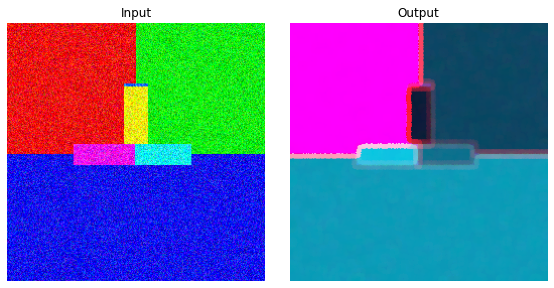

In [43]:
input_img3 = imageio.imread("colors_noise.png")
k = 5

# METHOD 2
output_img3 = compositionOp(input_img3,k).astype(np.uint8)
print("Error Test Case 3:  %.4f" % (rmse(input_img3.astype(float), output_img3.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img3)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img3)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

### Test Case 4

In [44]:
input_img4 = imageio.imread("pencil.png")
k = 2

# METHOD 2
output_img4 = compositionOp(input_img4,k).astype(np.uint8)
print("Error Test Case 4:  %.4f" % (rmse(input_img4.astype(float), output_img4.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img4)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img4)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

Error Test Case 4:  109.3405


### Test Case 5

In [45]:
input_img5 = imageio.imread("colors_noise.png")
k = 2

# METHOD 3
# performing the RGB opening, size of the structuring element = 2*k
kp = 2*k
mod_imgc5 = RGB_opening(input_img5,kp)
# using the opened image as input to the composition method, size of the structuring element = k
output_img5 =  compositionOp(mod_imgc5,k).astype(np.uint8)

print("Error Test Case 5:  %.4f" % (rmse(input_img5.astype(float), output_img5.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img5)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img5)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

Error Test Case 5:  111.8898


### Test Case 6

In [46]:
input_img6 = imageio.imread("pencil.png")
k = 5

# METHOD 3
# performing the RGB opening, size of the structuring element = 2*k
kp = 2*k
mod_imgc6 = RGB_opening(input_img6,kp)
# using the opened image as input to the composition method, size of the structuring element = k
output_img6 =  compositionOp(mod_imgc6,k).astype(np.uint8)
print("Error Test Case 6:  %.4f" % (rmse(input_img6.astype(float), output_img6.astype(float))))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(input_img6)
ax0.set_title("Input")
ax0.axis('off')
ax1.imshow(output_img6)
ax1.set_title("Output")
ax1.axis('off')
fig.tight_layout()

Error Test Case 6:  106.1342
